## This kernel train random forest model with randomized search CV for hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
from time import time
from collections import OrderedDict
from scipy.stats import randint as randint, uniform
from sklearn.model_selection import KFold
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Prepare the dataset

In [3]:
rmv_names_path = '../output/columns/forceremove.column.names'
rmv_names = list(line.strip() for line in open(rmv_names_path, 'r'))
print('number of features removed: {}'.format(len(rmv_names)))

number of features removed: 688


In [4]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
print('train set shape: {}'.format(train.shape))
print('test set shape: {}'.format(test.shape))

train set shape: (4459, 4993)
test set shape: (49342, 4992)


In [5]:
y_train = np.log1p(train.target)
train.drop(['ID', 'target'] + rmv_names, axis=1, inplace=True)
test_ID = test.ID
test.drop(['ID'] + rmv_names, axis=1, inplace=True)

### Train model with RandomForest Regressor

#### specify parameters and distributions to sample from

In [5]:
params = {'n_estimators': 2000,
          'oob_score': False,
          'n_jobs': 1,
          'random_state': 8668}
clf = RandomForestRegressor()
clf.set_params(**params)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=8668, verbose=0, warm_start=False)

In [6]:
param_distr = {"max_depth": [3, 6, None],
               "max_features": uniform(0, 1),
               "min_samples_split": randint(2, 11),
               "min_samples_leaf": randint(1, 11),
               "bootstrap": [True, False]
              }

In [7]:
n_iter_search = 32
random_search = RandomizedSearchCV(clf, param_distributions=param_distr, 
                                   n_iter=n_iter_search, 
                                   scoring='neg_mean_squared_error', 
                                   n_jobs=8, cv=4, verbose=2, random_state=4832, return_train_score=True)

In [8]:
start = time()
random_search.fit(train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV] bootstrap=False, max_depth=6, max_features=0.19884724302209555, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=False, max_depth=6, max_features=0.19884724302209555, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=False, max_depth=6, max_features=0.19884724302209555, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=False, max_depth=6, max_features=0.19884724302209555, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=False, max_depth=None, max_features=0.2699032027445013, min_samples_leaf=3, min_samples_split=3 
[CV] bootstrap=False, max_depth=None, max_features=0.2699032027445013, min_samples_leaf=3, min_samples_split=3 
[CV] bootstrap=False, max_depth=None, max_features=0.2699032027445013, min_samples_leaf=3, min_samples_split=3 
[CV] bootstrap=False, max_depth=None, max_features=0.2699032027445013, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=False, max_depth=6, max_features=0

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 94.6min


[CV]  bootstrap=True, max_depth=6, max_features=0.9923049663053465, min_samples_leaf=3, min_samples_split=9, total=18.6min
[CV] bootstrap=True, max_depth=3, max_features=0.42895594613886634, min_samples_leaf=1, min_samples_split=4 
[CV]  bootstrap=True, max_depth=6, max_features=0.9923049663053465, min_samples_leaf=3, min_samples_split=9, total=18.4min
[CV] bootstrap=True, max_depth=3, max_features=0.42895594613886634, min_samples_leaf=1, min_samples_split=4 
[CV]  bootstrap=True, max_depth=6, max_features=0.9923049663053465, min_samples_leaf=3, min_samples_split=9, total=18.8min
[CV] bootstrap=True, max_depth=3, max_features=0.42895594613886634, min_samples_leaf=1, min_samples_split=4 
[CV]  bootstrap=True, max_depth=3, max_features=0.42895594613886634, min_samples_leaf=1, min_samples_split=4, total= 3.7min
[CV] bootstrap=False, max_depth=None, max_features=0.39890964953933383, min_samples_leaf=2, min_samples_split=10 
[CV]  bootstrap=True, max_depth=3, max_features=0.4289559461388663

[CV]  bootstrap=False, max_depth=6, max_features=0.6198425057741686, min_samples_leaf=3, min_samples_split=3, total=16.4min
[CV] bootstrap=False, max_depth=6, max_features=0.14778004660893684, min_samples_leaf=8, min_samples_split=4 
[CV]  bootstrap=False, max_depth=6, max_features=0.6198425057741686, min_samples_leaf=3, min_samples_split=3, total=16.3min
[CV] bootstrap=False, max_depth=6, max_features=0.14778004660893684, min_samples_leaf=8, min_samples_split=4 
[CV]  bootstrap=True, max_depth=6, max_features=0.17073527567033164, min_samples_leaf=7, min_samples_split=3, total= 2.9min
[CV] bootstrap=False, max_depth=6, max_features=0.14778004660893684, min_samples_leaf=8, min_samples_split=4 
[CV]  bootstrap=True, max_depth=6, max_features=0.17073527567033164, min_samples_leaf=7, min_samples_split=3, total= 2.9min
[CV] bootstrap=False, max_depth=6, max_features=0.14778004660893684, min_samples_leaf=8, min_samples_split=4 
[CV]  bootstrap=True, max_depth=6, max_features=0.17073527567033

[CV]  bootstrap=True, max_depth=6, max_features=0.7981573693769849, min_samples_leaf=6, min_samples_split=10, total=15.4min
[CV] bootstrap=True, max_depth=3, max_features=0.4329081347255478, min_samples_leaf=7, min_samples_split=3 
[CV]  bootstrap=True, max_depth=3, max_features=0.4329081347255478, min_samples_leaf=7, min_samples_split=3, total= 3.8min
[CV] bootstrap=False, max_depth=6, max_features=0.9703257276912514, min_samples_leaf=8, min_samples_split=10 
[CV]  bootstrap=True, max_depth=3, max_features=0.4329081347255478, min_samples_leaf=7, min_samples_split=3, total= 3.8min
[CV] bootstrap=False, max_depth=6, max_features=0.9703257276912514, min_samples_leaf=8, min_samples_split=10 
[CV]  bootstrap=True, max_depth=3, max_features=0.4329081347255478, min_samples_leaf=7, min_samples_split=3, total= 3.8min
[CV] bootstrap=False, max_depth=6, max_features=0.9703257276912514, min_samples_leaf=8, min_samples_split=10 
[CV]  bootstrap=True, max_depth=3, max_features=0.4329081347255478, m

[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed: 280.7min finished


RandomizedSearchCV took 17926.85 seconds for 32 candidates parameter settings.


In [14]:
pd.DataFrame.from_dict(random_search.cv_results_).iloc[:,:9]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split
0,345.311288,0.303371,-2.474091,-2.156342,False,6,0.198847,2,4
1,2416.266163,1.306735,-2.077900,-0.163972,False,None,0.269903,3,3
2,1105.797955,0.312099,-2.410534,-2.112925,True,6,0.991756,6,2
3,4884.298717,0.891159,-2.186199,-0.482989,False,None,0.739107,6,7
4,591.298427,0.274287,-2.444088,-2.121102,False,6,0.358575,5,9
5,30.342612,0.186332,-2.774360,-2.703432,False,3,0.036191,4,2
6,1540.686499,1.168308,-2.046739,-0.622629,True,None,0.270323,3,8
7,1110.998215,0.270112,-2.410932,-2.096096,True,6,0.992305,3,9
8,225.637775,0.197644,-2.672061,-2.570802,True,3,0.428956,1,4
9,3935.940616,1.342126,-2.111184,-0.112288,False,None,0.39891,2,10


In [18]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -2.047 (std: 0.111)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.2703233753810498, 'min_samples_leaf': 3, 'min_samples_split': 8}
Model with rank: 2
Mean validation score: -2.049 (std: 0.112)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.40119839211397557, 'min_samples_leaf': 4, 'min_samples_split': 8}
Model with rank: 3
Mean validation score: -2.053 (std: 0.111)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.11528324754151764, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [19]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2703233753810498, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=8668, verbose=0, warm_start=False)

#### Make predictions on test data with the best estimator

In [20]:
sub_df = pd.DataFrame(test_ID, columns=['ID'])
y_pred = random_search.predict(test)
y_pred = np.exp(y_pred) - 1
sub_df['target'] = y_pred

In [21]:
sub_df.to_csv('../output/sub_rf_randomizedCV.csv', index=False)

Conclusion : The best model gives 1.48 on public leader board.

#### Plot oob error 

In [6]:
def _oob_errors_max_features(X_train, y_train):
    min_est, max_est, delta_est = 100, 2000, 100
    ensemble_clfs = [
        ("RandomForestRegressor, max_features=0.27",
         RandomForestRegressor(n_jobs=-1, oob_score=True, max_features=0.27, random_state=3668)),
        ("RandomForestRegressor, max_features='sqrt'",
         RandomForestRegressor(n_jobs=-1, oob_score=True, max_features="sqrt", random_state=3668)),
        ("RandomForestRegressor, max_features='log2'",
         RandomForestRegressor(n_jobs=-1, max_features='log2', oob_score=True, random_state=3668)),
        ("RandomForestRegressor, max_features=None",
         RandomForestRegressor(n_jobs=-1, max_features=None, oob_score=True, random_state=3668))
        ]
    error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
    params = {"max_depth": None,
              "min_samples_split": 8,
              "min_samples_leaf": 3,
              "bootstrap": True
              }

    for label, clf in ensemble_clfs:
        clf.set_params(**params)
        for i in range(min_est, max_est + 1, delta_est):
            print(label, 'n_estimators: ', i, end='\t')
            start = time()
            clf.set_params(n_estimators=i)
            clf.fit(X_train, y_train)
            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))
            
            end = time()
            m, s = divmod(end-start, 60)
            h, m = divmod(m, 60)
            print("time elapsed: %d:%02d:%02d" % (h, m, s))

    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    plt.xlim(min_est, max_est)
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

RandomForestRegressor, max_features=0.27 n_estimators:  100	time elapsed: 0:00:29
RandomForestRegressor, max_features=0.27 n_estimators:  200	time elapsed: 0:00:56
RandomForestRegressor, max_features=0.27 n_estimators:  300	time elapsed: 0:01:24
RandomForestRegressor, max_features=0.27 n_estimators:  400	time elapsed: 0:01:51
RandomForestRegressor, max_features=0.27 n_estimators:  500	time elapsed: 0:02:19
RandomForestRegressor, max_features=0.27 n_estimators:  600	time elapsed: 0:02:46
RandomForestRegressor, max_features=0.27 n_estimators:  700	time elapsed: 0:03:14
RandomForestRegressor, max_features=0.27 n_estimators:  800	time elapsed: 0:03:42
RandomForestRegressor, max_features=0.27 n_estimators:  900	time elapsed: 0:04:09
RandomForestRegressor, max_features=0.27 n_estimators:  1000	time elapsed: 0:04:41
RandomForestRegressor, max_features=0.27 n_estimators:  1100	time elapsed: 0:05:07
RandomForestRegressor, max_features=0.27 n_estimators:  1200	time elapsed: 0:05:32
RandomForestR

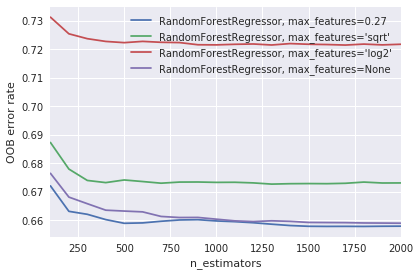

In [7]:
_oob_errors_max_features(train, y_train)

### Retrain the best model with 10-fold CV, Output train and test MSE as a measure of performance

In [8]:
def run_model(dtrain, dtest=None):
    params = {'max_features': 0.27,
              'bootstrap': True,
              'criterion': 'mse',
              'max_depth': None,
              'n_estimators': 2000,
              'min_samples_leaf': 3,
              'min_samples_split': 8,
              'oob_score': True,
              'n_jobs': -1,
              'random_state': 3668
              }
    clf = RandomForestRegressor()
    clf.set_params(**params)
    if dtest:
        clf.fit(dtrain[0], dtrain[1])
        y_train_pred, y_test_pred = clf.predict(dtrain[0]), clf.predict(dtest[0])
        y_train_loss, y_test_loss = mean_squared_error(dtrain[1], y_train_pred), mean_squared_error(dtest[1], y_test_pred)
        return clf, y_train_loss, y_test_loss
    else:
        clf.fit(dtrain[0], dtrain[1])
        y_train_pred = clf.predict(dtrain[0])
        y_train_loss = mean_squared_error(dtrain[1], y_train_pred)
        return clf, y_train_loss

In [9]:
def train_cv(X_train, y_train, X_test, n_folds=5):
    cv_scores, y_preds = [], []
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=816)
    for i, (train_ind, val_ind) in enumerate(kf.split(X_train)):
        print("Running Fold", i + 1, "/", n_folds, end='\t')
        train_x, val_x = X_train.iloc[train_ind, :], X_train.iloc[val_ind, :]
        train_y, val_y = y_train.iloc[train_ind], y_train.iloc[val_ind]
        clf, train_loss, val_loss = run_model((train_x, train_y), (val_x, val_y))
        cv_scores.append([train_loss, val_loss])
        y_pred = clf.predict(X_test)
        y_preds.append(y_pred)
        print("train_loss: {0:.6f}, val_loss: {1:.6f}".format(train_loss, val_loss))
        
    y_pred = np.mean(np.array(y_preds), axis=0)    
    mean_train_loss = np.mean([cv_scores[i][0] for i in range(len(cv_scores))])
    mean_val_loss = np.mean([cv_scores[i][1] for i in range(len(cv_scores))])
    print("train_loss mean: {0:.6f}, val_loss mean: {1:.6f}".format(mean_train_loss, mean_val_loss))
       
    return y_pred

In [10]:
y_pred = train_cv(train, y_train, test, n_folds=10)

Running Fold 1 / 10	train_loss: 0.613823, val_loss: 2.103926
Running Fold 2 / 10	train_loss: 0.620117, val_loss: 1.938450
Running Fold 3 / 10	train_loss: 0.616563, val_loss: 2.033117
Running Fold 4 / 10	train_loss: 0.614277, val_loss: 2.021332
Running Fold 5 / 10	train_loss: 0.620374, val_loss: 1.915739
Running Fold 6 / 10	train_loss: 0.619880, val_loss: 1.970679
Running Fold 7 / 10	train_loss: 0.615819, val_loss: 2.177698
Running Fold 8 / 10	train_loss: 0.610681, val_loss: 2.282867
Running Fold 9 / 10	train_loss: 0.623420, val_loss: 1.856620
Running Fold 10 / 10	train_loss: 0.617032, val_loss: 1.988145
train_loss mean: 0.617198, val_loss mean: 2.028857


In [11]:
sub_df = pd.DataFrame(test_ID, columns=['ID'])
y_pred = np.exp(y_pred) - 1
sub_df['target'] = y_pred
sub_df.to_csv('../output/sub_rf_10foldCV.csv', index=False)

### Plot feature importance

In [30]:
def _feature_importance(feat_names, importance, nrows):
    feat_importances = pd.DataFrame({'feature': feat_names, 'importance': importance})
    feat_importances = feat_importances.sort_values(by='importance', ascending=False)
    #print(feat_importances[:nrows])

    plt.style.use('ggplot')
    feat_importances = feat_importances.sort_values(by='importance', ascending=True)[-nrows:]
    feat_importances.plot(kind='barh', x='feature', y='importance', legend=False, figsize=(8, 12))
    plt.title('Ramdom Forest Feature Importance')
    plt.xlabel('relative importance')
    plt.tight_layout()
    plt.show()

In [18]:
params = {'max_features': 0.27,
          'bootstrap': True,
          'max_depth': None,
          'n_estimators': 2000,
          'min_samples_leaf': 3,
          'min_samples_split': 8,
          'oob_score': True,
          'n_jobs': -1,
          'verbose': 1,
          'random_state': 3668
         }

clf = RandomForestRegressor()
clf.set_params(**params)
clf.fit(train, y_train)
print('OOB error: {0:.3f}'.format(1-clf.oob_score_))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.1min finished


OOB error: 0.658


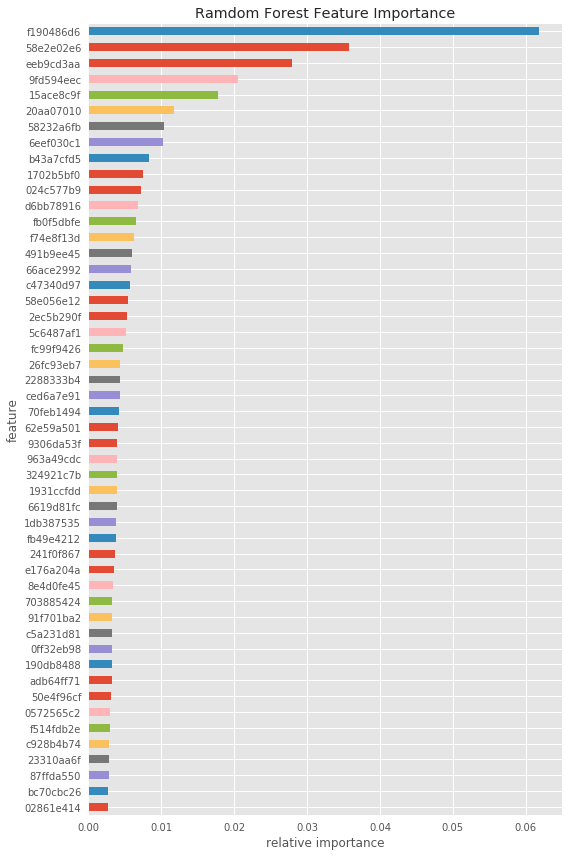

In [31]:
_feature_importance(train.columns.values, clf.feature_importances_, nrows=50)